In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install statsmodel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit_learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                            OLS Regression Results                            
Dep. Variable:                    SYN   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:57:15   Log-Likelihood:                -7336.9
No. Observations:                4407   AIC:                         1.472e+04
Df Residuals:                    4384   BIC:                         1.487e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

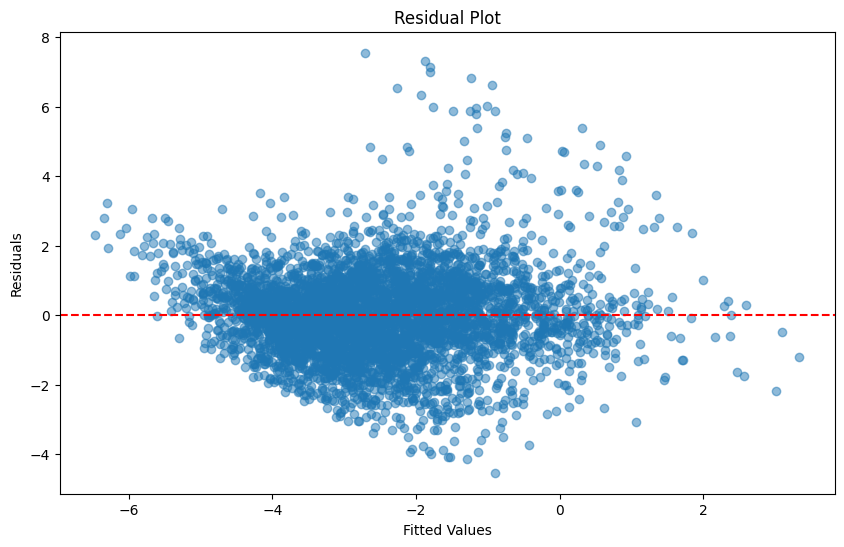

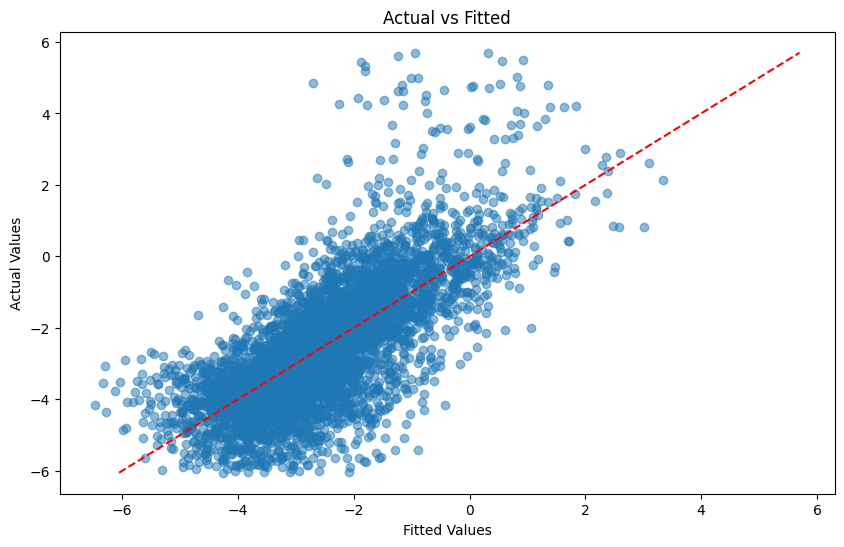

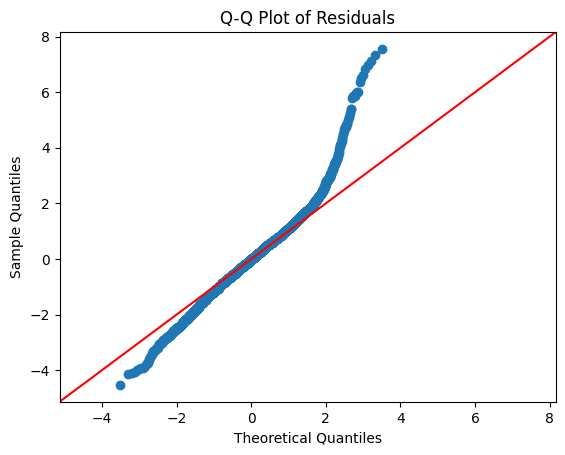

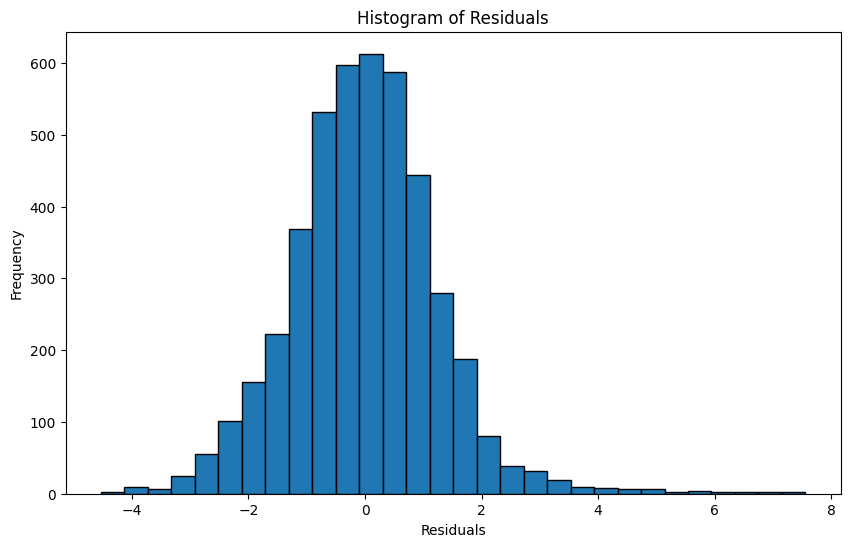

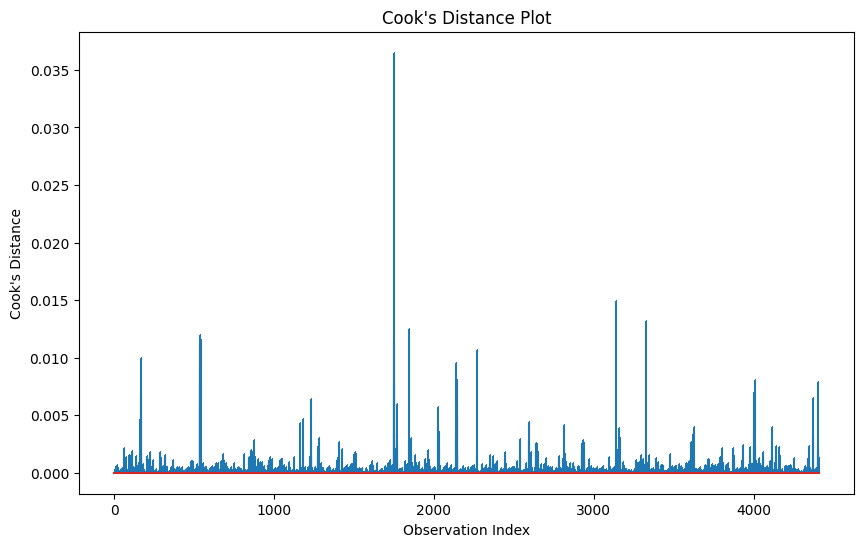

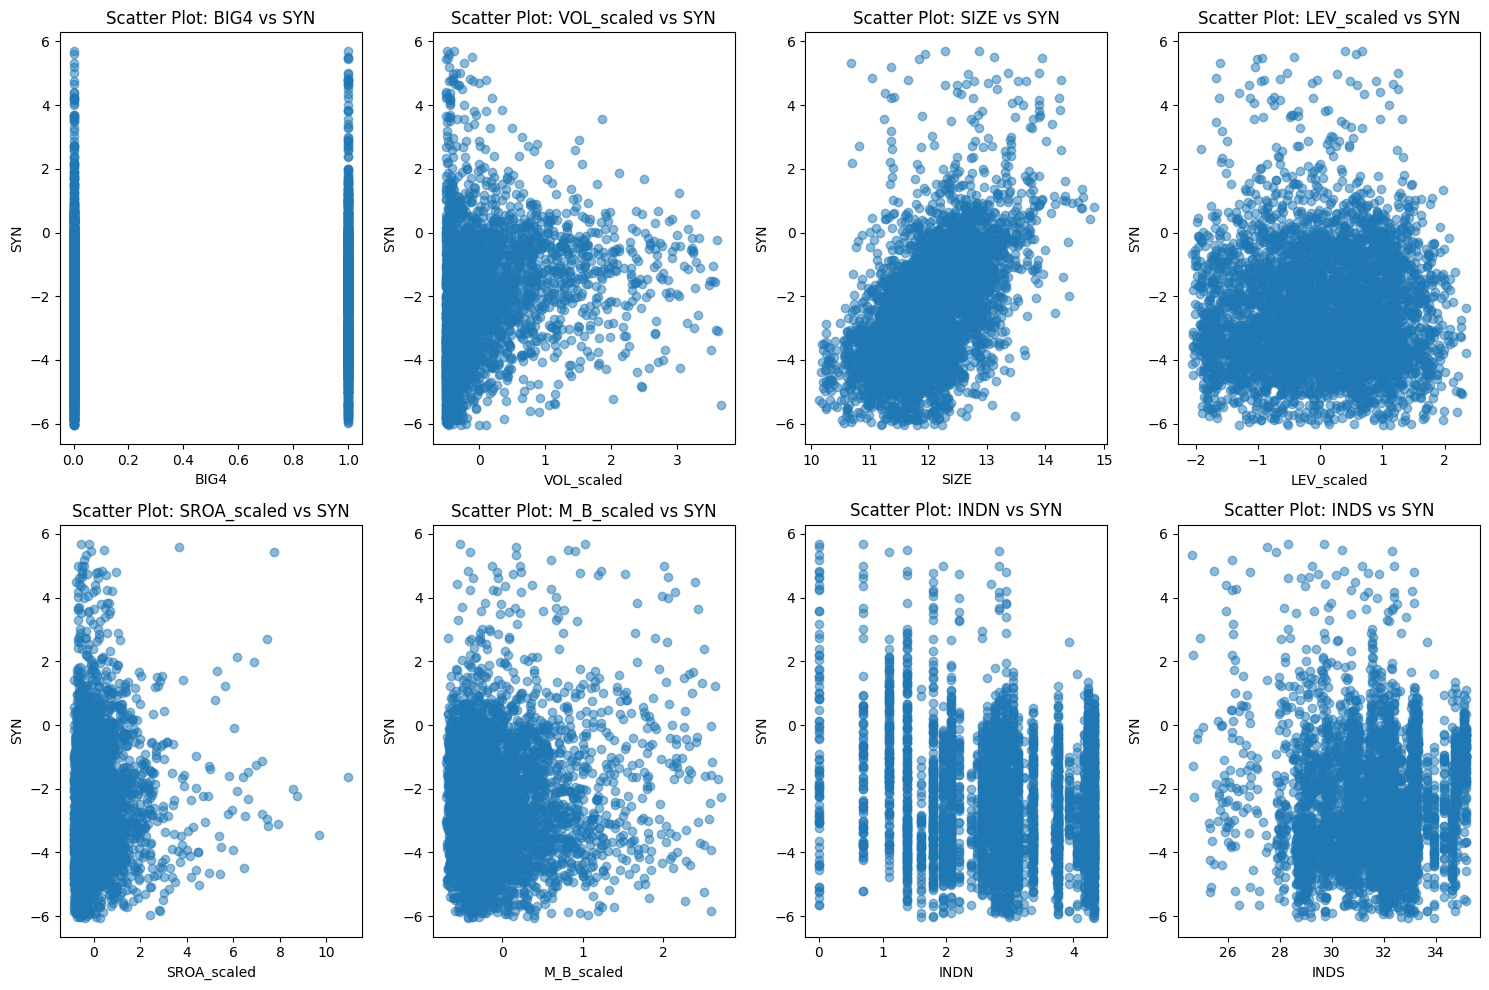

In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế
data = pd.read_csv(file_path)

# Chuẩn hóa các biến
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled', 
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
# Xác định ngưỡng phân vị 1% và 99% cho mỗi biến
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]


# Lấy các biến giả năm và ngành đã có trong dữ liệu
year_dummies = data.filter(like='Year_')  # Tất cả các cột bắt đầu bằng "Year_"
industry_dummies = data.filter(like='Industry_')  # Tất cả các cột bắt đầu bằng "Industry_"

# Loại bỏ một số biến giả để giảm đa cộng tuyến
year_dummies_reduced = year_dummies[['Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 
                                     'Year_2021', 'Year_2022']]  # Loại bỏ một số biến giả năm
industry_dummies_reduced = industry_dummies[['Industry_Congnghethongtin', 'Industry_Daukhi', 'Industry_Dichvutieudung', 
                                             'Industry_Duocphamvayte', 'Industry_Hangtieudung', 'Industry_Nguyenvatlieu', 
                                             'Industry_Taichinh']]  # Loại bỏ một số biến giả ngành

# Chọn các biến độc lập bao gồm biến đã chuẩn hóa, các biến giả đã giảm, và biến độ trễ của SYNCH
X = pd.concat([data[['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled', 
                     'INDS_scaled']], year_dummies_reduced, industry_dummies_reduced], axis=1)

# Biến phụ thuộc là SYNCH
y = data['SYN']

# Xử lý NaN và Inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Loại bỏ các hàng có giá trị NaN hoặc Inf
y = y.loc[X.index]  # Đồng bộ y với các hàng còn lại trong X

# Thêm hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Thực hiện hồi quy OLS với clustering theo nhóm công ty (giả sử cột 'ma' là mã công ty)
model = sm.OLS(y, X).fit()

# Hiển thị kết quả hồi quy
print(model.summary())

# Bước 1: Biểu đồ phần dư
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Bước 2: Biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, y, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--')
plt.title('Actual vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.show()

# Bước 3: Biểu đồ Q-Q plot
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Bước 4: Biểu đồ histogram của phần dư
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bước 5: Biểu đồ Cook's Distance
influence = model.get_influence()
(c, p) = influence.cooks_distance

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

# Bước 6: Scatter Plot giữa các biến độc lập và biến phụ thuộc (SYNCH)
independent_vars = ['BIG4', 'VOL_scaled', 'SIZE', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN', 'INDS']

plt.figure(figsize=(15, 10))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 4, i)
    plt.scatter(data[var], data['SYN'], alpha=0.5)
    plt.title(f'Scatter Plot: {var} vs SYN')
    plt.xlabel(var)
    plt.ylabel('SYN')

plt.tight_layout()
plt.show()

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tính VIF cho các biến độc lập (trừ cột hằng số)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Hiển thị kết quả VIF
print(vif_data)

                     Variable        VIF
0                       const  19.567929
1                        BIG4   1.220252
2                  VOL_scaled   1.191503
3                 SIZE_scaled   1.792305
4                  LEV_scaled   1.266803
5                 SROA_scaled   1.143556
6                  M_B_scaled   1.177850
7                 INDN_scaled   5.057263
8                 INDS_scaled   6.341052
9                   Year_2016   1.724750
10                  Year_2017   1.752935
11                  Year_2018   1.748888
12                  Year_2019   1.777612
13                  Year_2020   1.804294
14                  Year_2021   1.752015
15                  Year_2022   1.751241
16  Industry_Congnghethongtin   1.339285
17            Industry_Daukhi   1.174639
18    Industry_Dichvutieudung   2.222984
19     Industry_Duocphamvayte   1.453626
20      Industry_Hangtieudung   2.348770
21     Industry_Nguyenvatlieu   3.782436
22          Industry_Taichinh   2.375278


In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế
data = pd.read_csv(file_path)

# Chuẩn hóa các biến
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled', 
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
# Xác định ngưỡng phân vị 1% và 99% cho mỗi biến
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Chọn các biến độc lập bao gồm biến đã chuẩn hóa, các biến giả đã giảm, và biến độ trễ của SYNCH
X = pd.concat([data[['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled', 
                     'INDS_scaled']]], axis=1)

# Biến phụ thuộc là SYNCH
y = data['SYN']

# Xử lý NaN và Inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Loại bỏ các hàng có giá trị NaN hoặc Inf
y = y.loc[X.index]  # Đồng bộ y với các hàng còn lại trong X

# Thêm hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Thực hiện hồi quy OLS với clustering theo nhóm công ty (giả sử cột 'ma' là mã công ty)
model = sm.OLS(y, X).fit()

# Hiển thị kết quả hồi quy
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SYN   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     458.1
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:25:54   Log-Likelihood:                -7629.5
No. Observations:                4407   AIC:                         1.528e+04
Df Residuals:                    4398   BIC:                         1.533e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.3818      0.025    -94.525      

                          PanelOLS Estimation Summary                           
Dep. Variable:                    SYN   R-squared:                        0.0833
Estimator:                   PanelOLS   R-squared (Between):              0.2351
No. Observations:                4407   R-squared (Within):               0.1765
Date:                Sun, Nov 17 2024   R-squared (Overall):              0.2355
Time:                        13:21:36   Log-likelihood                   -5641.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      43.051
Entities:                         604   P-value                           0.0000
Avg Obs:                       7.2964   Distribution:                  F(8,3788)
Min Obs:                       1.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             43.051
                            

C:\Users\minhthao372003\AppData\Roaming\Python\Python312\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


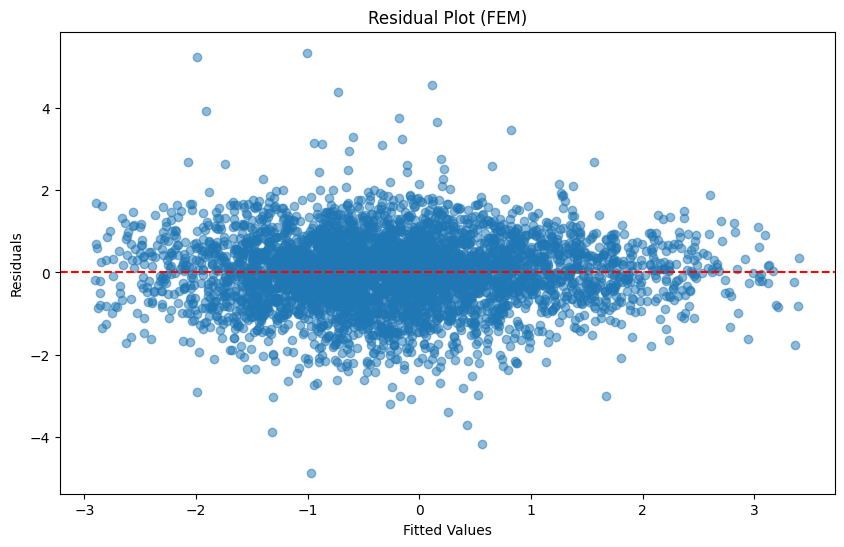

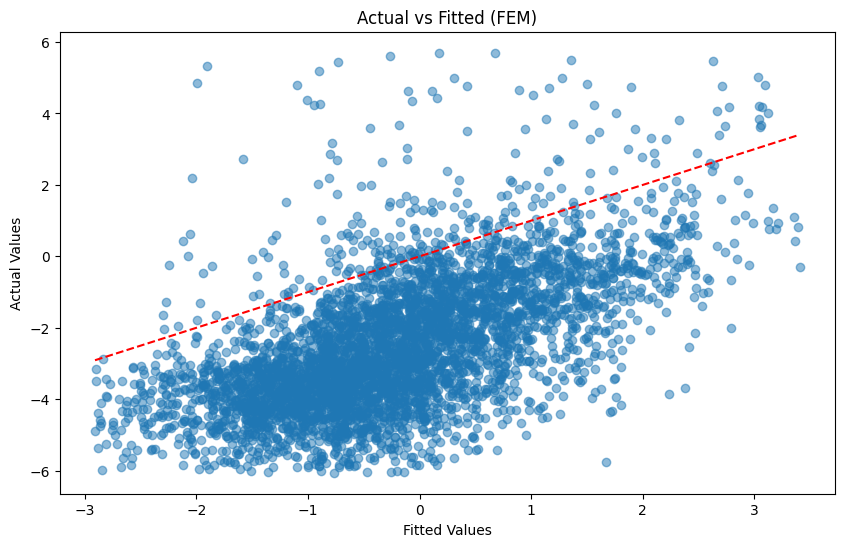

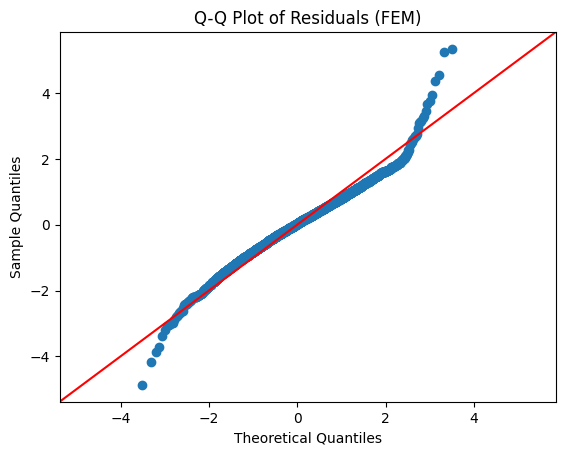

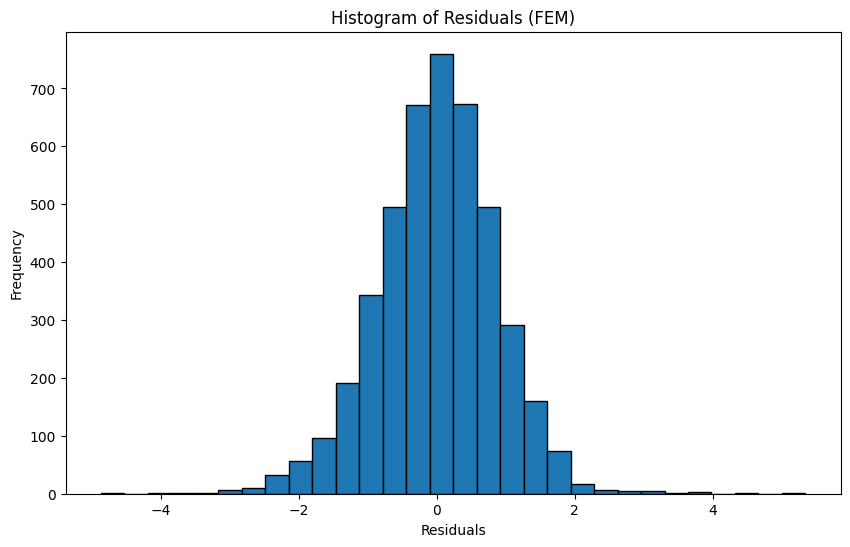

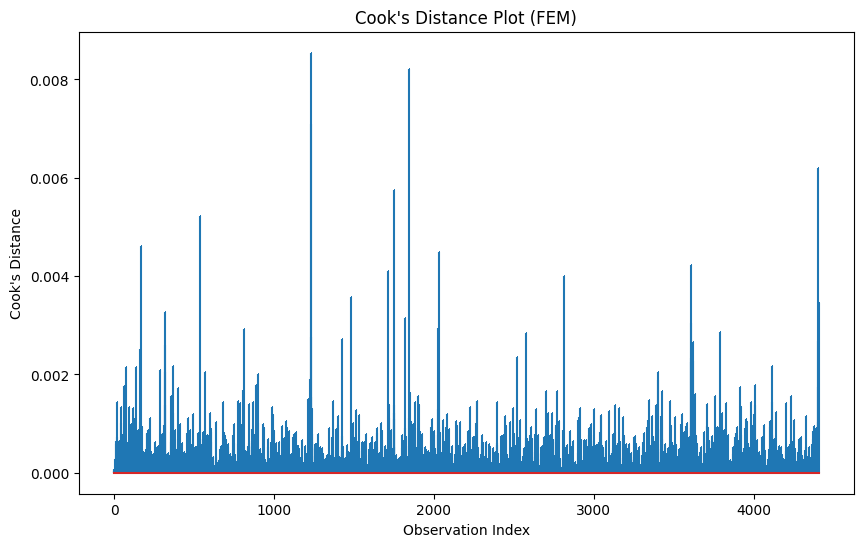

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế
data = pd.read_csv(file_path)

# Chuẩn hóa các biến (VOL, M/B, INDN, INDS)
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled',
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Chuyển dữ liệu thành dạng panel
data = data.set_index(['ma', 'year'])  # 'ma' là mã công ty, 'year' là năm

# Xác định các biến độc lập và biến phụ thuộc
variables = ['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled',
             'INDS_scaled']

# Thiết lập công thức hồi quy Fixed Effects Model
formula = 'SYN ~ ' + ' + '.join(variables) + ' + EntityEffects + TimeEffects'  # EntityEffects dùng cho yếu tố cố định theo công ty

# Thực hiện hồi quy Fixed Effects Model (FEM)
model = PanelOLS.from_formula(formula, data=data)
fem_results = model.fit() 

# Hiển thị kết quả hồi quy
print(fem_results.summary)

# Kiểm tra phần dư (Residuals)
residuals = fem_results.resids
fitted_values = fem_results.fitted_values
actual_values = data['SYN']  # Giá trị thực tế của biến phụ thuộc

# Đồng bộ chỉ số của actual_values với chỉ số của fitted_values
actual_values = actual_values.loc[fitted_values.index]

# Bước 1: Biểu đồ phần dư (Residual Plot)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (FEM)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Bước 2: Biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán (Actual vs Fitted)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, actual_values, alpha=0.5)
plt.plot(
    [fitted_values.min(), fitted_values.max()],
    [fitted_values.min(), fitted_values.max()],
    color='r',
    linestyle='--'
)
plt.title('Actual vs Fitted (FEM)')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.show()

# Bước 3: Biểu đồ Q-Q plot (Q-Q Plot of Residuals)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals (FEM)')
plt.show()

# Bước 4: Biểu đồ histogram của phần dư (Histogram of Residuals)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (FEM)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bước 5: Biểu đồ Cook's Distance (Cook's Distance Plot)
# Tính toán Cook's Distance
influence = residuals**2 / (residuals.var() * len(residuals))
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(influence)), influence, markerfmt=",")
plt.title("Cook's Distance Plot (FEM)")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tính VIF cho các biến độc lập (trừ cột hằng số)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Hiển thị kết quả VIF
print(vif_data)

      Variable       VIF
0        const  1.495309
1         BIG4  1.187935
2   VOL_scaled  1.123609
3  SIZE_scaled  1.762325
4   LEV_scaled  1.230041
5  SROA_scaled  1.111203
6   M_B_scaled  1.089596
7  INDN_scaled  3.451863
8  INDS_scaled  3.928685


                        RandomEffects Estimation Summary                        
Dep. Variable:                    SYN   R-squared:                        0.2555
Estimator:              RandomEffects   R-squared (Between):              0.5145
No. Observations:                4407   R-squared (Within):               0.1940
Date:                Sun, Nov 17 2024   R-squared (Overall):              0.4222
Time:                        12:52:10   Log-likelihood                   -6340.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      188.65
Entities:                         604   P-value                           0.0000
Avg Obs:                       7.2964   Distribution:                  F(8,4398)
Min Obs:                       1.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             197.05
                            

C:\Users\minhthao372003\AppData\Roaming\Python\Python312\site-packages\linearmodels\panel\model.py:2759: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


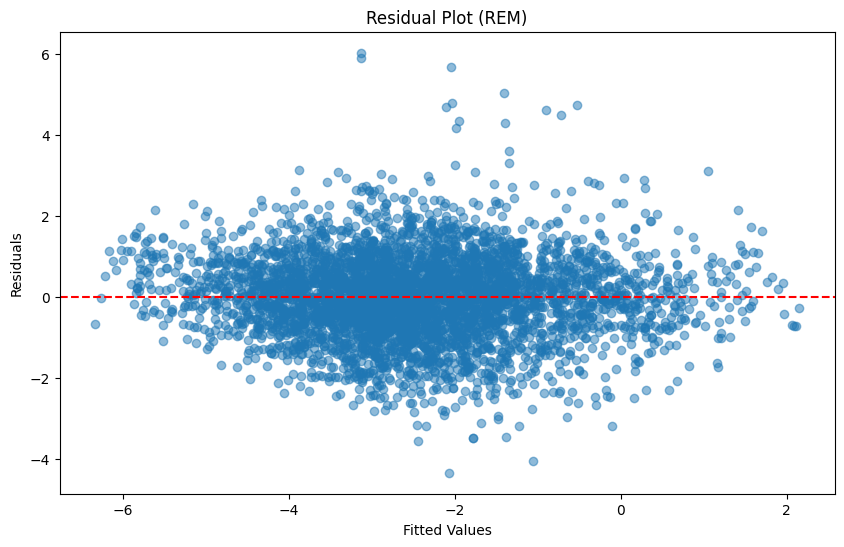

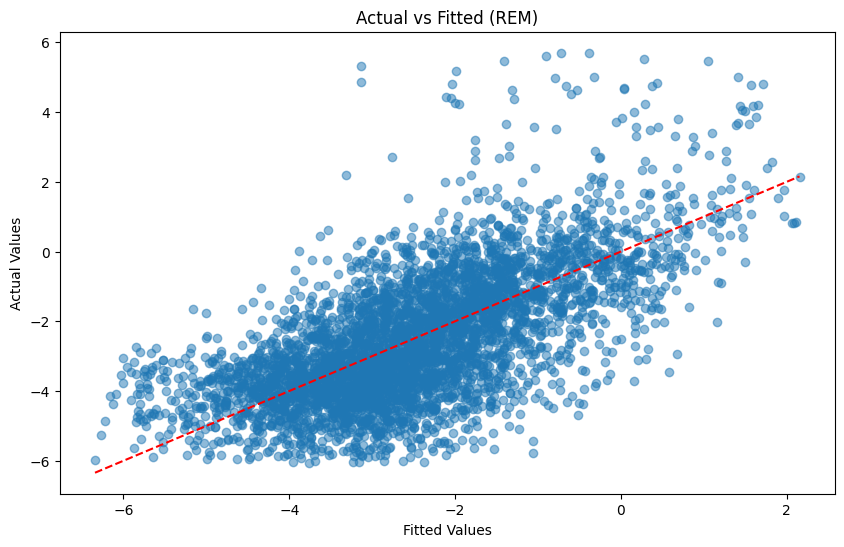

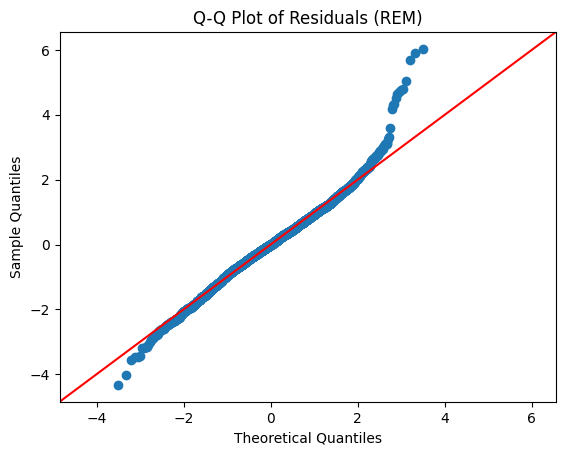

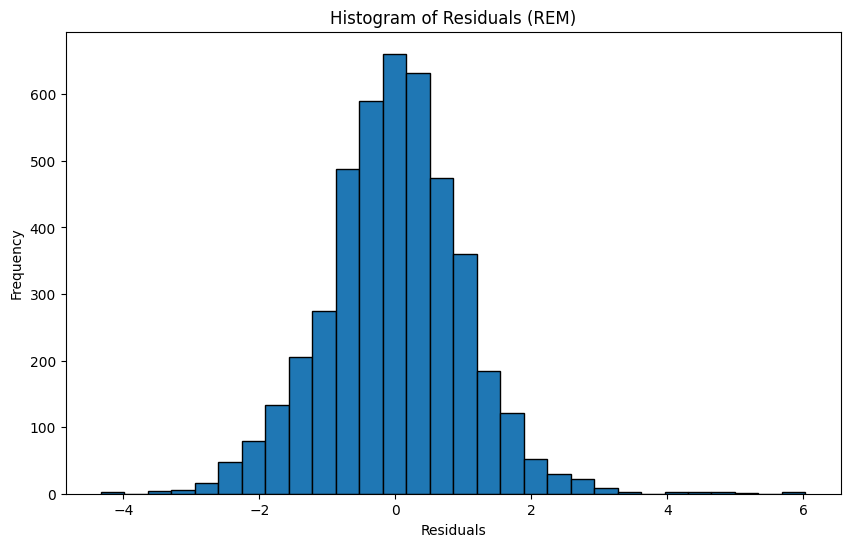

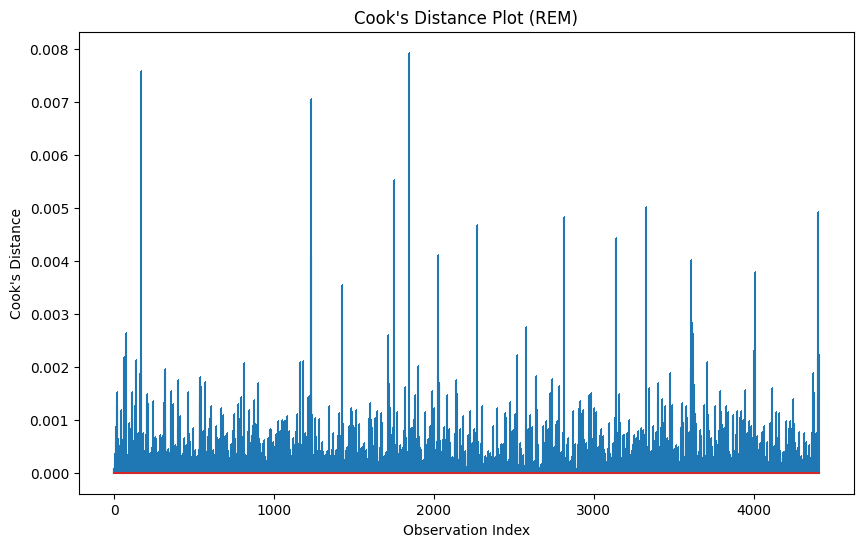

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import RandomEffects

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế của bạn
data = pd.read_csv(file_path)

# Chuẩn hóa các biến (VOL, M/B, INDN, INDS)
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled',
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Chuyển dữ liệu thành dạng panel
data = data.set_index(['ma', 'year'])  # 'ma' là mã công ty, 'year' là năm

# Xác định các biến độc lập và biến phụ thuộc
variables = ['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled',
             'INDS_scaled']
y = data['SYN']
X = data[variables]

# Thêm hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Thực hiện hồi quy Random Effects Model (REM)
model = RandomEffects(y, X)
rem_results = model.fit()

# Hiển thị kết quả hồi quy
print(rem_results.summary)

# Kiểm tra phần dư (Residuals)
residuals = rem_results.resids
fitted_values = rem_results.fitted_values
actual_values = y.loc[fitted_values.index]  # Đồng bộ chỉ số với fitted_values

# Bước 1: Biểu đồ phần dư (Residual Plot)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (REM)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Bước 2: Biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán (Actual vs Fitted)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, actual_values, alpha=0.5)
plt.plot(
    [fitted_values.min(), fitted_values.max()],
    [fitted_values.min(), fitted_values.max()],
    color='r',
    linestyle='--'
)
plt.title('Actual vs Fitted (REM)')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.show()

# Bước 3: Biểu đồ Q-Q plot (Q-Q Plot of Residuals)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals (REM)')
plt.show()

# Bước 4: Biểu đồ histogram của phần dư (Histogram of Residuals)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (REM)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bước 5: Biểu đồ Cook's Distance (Cook's Distance Plot)
# Tính toán Cook's Distance
influence = residuals**2 / (residuals.var() * len(residuals))
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(influence)), influence, markerfmt=",")
plt.title("Cook's Distance Plot (REM)")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()


In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế
data = pd.read_csv(file_path)

# Chuẩn hóa các biến
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled', 
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
# Xác định ngưỡng phân vị 1% và 99% cho mỗi biến
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Lấy các biến giả năm và ngành đã có trong dữ liệu
year_dummies = data.filter(like='Year_')  # Tất cả các cột bắt đầu bằng "Year_"
industry_dummies = data.filter(like='Industry_')  # Tất cả các cột bắt đầu bằng "Industry_"

# Loại bỏ một số biến giả để giảm đa cộng tuyến
year_dummies_reduced = year_dummies[['Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 
                                     'Year_2021', 'Year_2022']]  # Loại bỏ một số biến giả năm
industry_dummies_reduced = industry_dummies[['Industry_Congnghethongtin', 'Industry_Daukhi', 'Industry_Dichvutieudung', 
                                             'Industry_Duocphamvayte', 'Industry_Hangtieudung', 'Industry_Nguyenvatlieu', 
                                             'Industry_Taichinh']]  # Loại bỏ một số biến giả ngành

# Chọn các biến độc lập bao gồm biến đã chuẩn hóa, các biến giả đã giảm, và biến độ trễ của SYNCH
X_full = pd.concat([data[['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled', 
                     'INDS_scaled']], year_dummies_reduced, industry_dummies_reduced], axis=1)

# Biến phụ thuộc là SYNCH
y = data['SYN']

# Xử lý NaN và Inf
X_full = X_full.replace([np.inf, -np.inf], np.nan).dropna()  # Loại bỏ các hàng có giá trị NaN hoặc Inf
y = y.loc[X_full.index]  # Đồng bộ y với các hàng còn lại trong X_full

# Mô hình 1: OLS không có biến giả (nếu muốn so sánh)
X_reduced = data[['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled']]
X_reduced = X_reduced.replace([np.inf, -np.inf], np.nan).dropna()  # Xử lý NaN và Inf
X_reduced = sm.add_constant(X_reduced)  # Thêm hằng số (constant)

# Mô hình 2: OLS có các biến giả
X_full = sm.add_constant(X_full)  # Thêm hằng số (constant)

# Thực hiện mô hình OLS không có biến giả
model_reduced = sm.OLS(y, X_reduced).fit()

# Thực hiện mô hình OLS có biến giả
model_full = sm.OLS(y, X_full).fit()

# Kiểm tra F-test giữa hai mô hình
f_test_result = model_full.compare_f_test(model_reduced)
print(f"F-test Result: Statistic: {f_test_result[0]}, p-value: {f_test_result[1]}")


F-test Result: Statistic: 44.47989170933298, p-value: 2.1300948871832267e-115


In [45]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f

# Đọc dữ liệu
file_path = 'D:/data/file__data.csv'
data = pd.read_csv(file_path)

# Loại bỏ các biến giả bắt đầu bằng "Year_" và "Industry_"
columns_to_drop = [col for col in data.columns if col.startswith("Year_") or col.startswith("Industry_")]
data_filtered = data.drop(columns=columns_to_drop)

# Xác định biến phụ thuộc, biến độc lập, và làm sạch dữ liệu
dependent_var = "SYN"
independent_vars = ["BIG4", "VOL", "SIZE", "LEV", "SROA", "M/B", "INDN", "INDS"]
data_filtered_cleaned = data_filtered.dropna()

# Thiết lập dữ liệu dạng panel với chỉ mục
data_filtered_cleaned = data_filtered_cleaned.set_index(['ma', 'year'])

# Tạo ma trận các biến độc lập
X = sm.add_constant(data_filtered_cleaned[independent_vars])
y = data_filtered_cleaned[dependent_var]

# Tạo các biến giả đại diện cho hiệu ứng cố định (entity effects)
entity_dummies = pd.get_dummies(data_filtered_cleaned.index.get_level_values(0), drop_first=True)
entity_dummies = entity_dummies.reset_index(drop=True)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Gộp các biến giả vào ma trận biến độc lập cho FEM
X_fem = pd.concat([X, entity_dummies], axis=1)

# Chuyển đổi tất cả dữ liệu trong X_fem và y sang kiểu float
X_fem = X_fem.astype(float)
y = y.astype(float)

# 1. Ước lượng OLS
ols_model = sm.OLS(y, X).fit()

# 2. Ước lượng FEM
fem_model = sm.OLS(y, X_fem).fit()

# 3. Kiểm định F
numerator = (ols_model.ssr - fem_model.ssr) / entity_dummies.shape[1]
denominator = fem_model.ssr / (fem_model.nobs - fem_model.df_model - 1)
f_stat = numerator / denominator
p_value = 1 - f.cdf(f_stat, entity_dummies.shape[1], fem_model.nobs - fem_model.df_model - 1)

# Kết quả
print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 9.75842034903272
P-value: 1.1102230246251565e-16


In [46]:
import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS, RandomEffects
from scipy import stats

# Đọc dữ liệu từ file CSV
file_path = 'D:/data/file__data.csv'  # Thay bằng đường dẫn thực tế của bạn
data = pd.read_csv(file_path)

# Chuẩn hóa các biến (VOL, M/B, INDN, INDS)
scaler = StandardScaler()
data[['VOL_scaled', 'M_B_scaled', 'INDN_scaled', 'INDS_scaled', 'SIZE_scaled', 'LEV_scaled', 
      'SROA_scaled']] = scaler.fit_transform(data[['VOL', 'M/B', 'INDN', 'INDS', 'SIZE', 'LEV', 'SROA']])

# Trimming thủ công cho biến VOL, M/B, và SYNCH
trim_variables = ['VOL', 'M/B', 'SYN']
for var in trim_variables:
    lower_bound = data[var].quantile(0.01)
    upper_bound = data[var].quantile(0.99)
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Chuyển dữ liệu thành dạng panel
data = data.set_index(['ma', 'year'])  # 'ma' là mã công ty, 'year' là năm

# Xác định các biến độc lập và biến phụ thuộc
variables = ['BIG4', 'VOL_scaled', 'SIZE_scaled', 'LEV_scaled', 'SROA_scaled', 'M_B_scaled', 'INDN_scaled', 
             'INDS_scaled']
y = data['SYN']
X = data[variables]

# Thêm hằng số (constant) vào mô hình
X = sm.add_constant(X)

# Thực hiện hồi quy Fixed Effects Model (FEM)
fem_model = PanelOLS(y, X, entity_effects=True)
fem_results = fem_model.fit()

# Thực hiện hồi quy Random Effects Model (REM)
rem_model = RandomEffects(y, X)
rem_results = rem_model.fit()

# Kiểm định Hausman
b_diff = fem_results.params - rem_results.params  # Sai khác giữa các hệ số của FEM và REM
cov_diff = fem_results.cov - rem_results.cov      # Sai khác giữa các ma trận hiệp phương sai

# Tính toán giá trị thống kê Hausman
hausman_stat = b_diff.T @ np.linalg.inv(cov_diff) @ b_diff
df = len(b_diff)  # Số bậc tự do (số lượng biến)
p_value = 1 - stats.chi2.cdf(hausman_stat, df)

# Hiển thị kết quả kiểm định Hausman
print("Hausman Test Statistic:", hausman_stat)
print("Degrees of Freedom:", df)
print("p-value:", p_value)

# Kết luận
if p_value < 0.05:
    print("Kết quả kiểm định: Bác bỏ giả thuyết gốc. FEM là mô hình phù hợp hơn.")
else:
    print("Kết quả kiểm định: Không bác bỏ giả thuyết gốc. REM là mô hình phù hợp hơn.")


Hausman Test Statistic: 187.6578861536588
Degrees of Freedom: 9
p-value: 0.0
Kết quả kiểm định: Bác bỏ giả thuyết gốc. FEM là mô hình phù hợp hơn.


C:\Users\minhthao372003\AppData\Roaming\Python\Python312\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\minhthao372003\AppData\Roaming\Python\Python312\site-packages\linearmodels\panel\model.py:2759: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
